In [2]:
import numpy as np
import pandas as pd
from datasets import load_dataset
from setfit import SetFitModel
from datasets import load_dataset

### Inference on real data

In [20]:
# load test data
df_test = pd.read_csv('../temp_training/medallion/gold/MASTER_gold_verified.csv')

In [21]:
df_test

,URI,TOPIC,TITLE,BODY_SUMMARY
0,7405996862,aviation,Passengers took a 16-hour flight to nowhere af...,An Air New Zealand flight bound for New York o...
1,7402259886,aviation,Frankfurt airport halts most landings amid Luf...,Lufthansa forced to cancel or delay flights ac...
2,7412762767,aviation,Drone activity leads to flight disruption at D...,Small unmanned aircraft was first spotted on t...
3,7430022659,aviation,All flights grounded at airport near Penn Stat...,NEW: The Federal Aviation Administration issue...
4,7436851985,aviation,Flights diverted to Birmingham Airport as heav...,Planes from Bristol Airport were suspended due...
...,...,...,...,...
318,7507227834,warehouse_fire,"India News Fire at Play School in Gurugram, N...",A major fire broke out at a play school-cum-da...
319,7507227613,warehouse_fire,"Fire at play school in Gurugram, none hurt Sc...",A major fire broke out at a play school-cum-da...
320,7506671603,warehouse_fire,4 charred to death in blaze at firecracker god...,A massive fire at a firecracker warehouse near...
321,7506647667,warehouse_fire,Pictures show scale of huge fire at Gwynedd in...,"By 3pm, seven fire crews, police, and paramedi..."


In [37]:
test_texts = list(df_test['TITLE'] + ". " + df_test['BODY_SUMMARY'])
test_labels = list(df_test['TOPIC'])

In [40]:
test_labels_unique = list(set(test_labels))
test_labels_unique

['railway',
 'general_biz_trend',
 'domestic_unrest_violence',
 'individual_accidents_tragedies',
 'aviation',
 'later_report',
 'trade_war_embargos_bans',
 'warehouse_fire',
 'maritime',
 'war_conflict',
 'leisure_other_news',
 'strike',
 'transportation_trends_projects',
 'extreme_weather',
 'lawsuit_legal_insurance',
 'cybersecurity']

In [2]:
# Load SetFit model from Hub
model = SetFitModel.from_pretrained("joshuapsa/setfit-news-topic-paragraphs")

c:\Users\JOSHUALE\Documents\Github\mlflow_tutorial\venv\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\JOSHUALE\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


c:\Users\JOSHUALE\Documents\Github\mlflow_tutorial\venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.1.1 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\JOSHUALE\Documents\Github\mlflow_tutorial\venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.1 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\JOSHUALE\Documents\Github\mlflow_tutorial\venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle 

In [6]:
# load the original training dataset of the model:
training_dataset = load_dataset("joshuapsa/gpt-generated-news-paragraphs")

In [48]:
# getting the original order of the labels and compare that with the test set
non_labels = ['class_index', 'text', 'labels']
labels = [item for item in list(training_dataset['train'].features.keys()) if item not in non_labels]
labels

['aviation',
 'cybersecurity',
 'domestic_unrest_violence',
 'extreme_weather',
 'forced_labor',
 'general_biz_trend',
 'individual_accidents_tragedies',
 'later_report',
 'lawsuit_legal_insurance',
 'leisure_other_news',
 'maritime',
 'pandemics_large_scale_diseases',
 'railway',
 'strike',
 'trade_war_embargos_bans',
 'transportation_trends_projects',
 'war_conflict',
 'warehouse_fire']

In [49]:
test_labels_unique

['aviation',
 'cybersecurity',
 'domestic_unrest_violence',
 'extreme_weather',
 'general_biz_trend',
 'individual_accidents_tragedies',
 'later_report',
 'lawsuit_legal_insurance',
 'leisure_other_news',
 'maritime',
 'railway',
 'strike',
 'trade_war_embargos_bans',
 'transportation_trends_projects',
 'war_conflict',
 'warehouse_fire']

In [45]:
# getting prediction label arrays and probabilities
test_preds = model.predict(test_texts)
test_pred_probas = model.predict_proba(test_texts)

In [50]:
test_preds[0]

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=torch.int32)

In [51]:
# post-processing to get the predicted labels
pred_labels = [labels[np.argmax(pred)] for pred in test_preds]

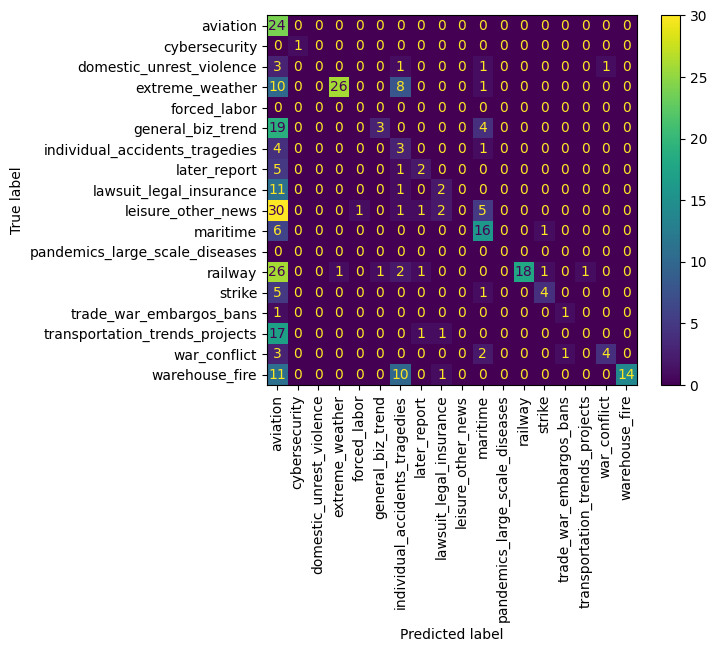

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true = test_labels, y_pred = pred_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation='vertical')

### Repeat on actual test data of the dataset used for training

In [4]:
# load the original training dataset of the model:
training_dataset = load_dataset("joshuapsa/gpt-generated-news-paragraphs-v1.1")
# convert to df for ease of working:
train_df = pd.DataFrame(training_dataset['train'])
test_df = pd.DataFrame(training_dataset['test'])

In [6]:
test_df.head(2)

,class_name,text,aviation,cybersecurity,domestic_unrest_violence,extreme_weather,forced_labor,general_biz_trend,individual_accidents_tragedies,later_report,...,maritime,pandemics_large_scale_diseases,railway,strike,trade_war_embargos_bans,transportation_trends_projects,war_conflict,warehouse_fire,class_index,label
0,strike,Textile workers in the fictional town of Fabri...,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,13,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,forced_labor,"London, UK, is rocked by a forced labor scanda...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
test_texts = list(test_df['text'])
test_labels = list(test_df['class_name'])

In [ ]:
# Load SetFit model from Hub
model = SetFitModel.from_pretrained("joshuapsa/setfit-news-topic-paragraphs")

In [ ]:
# getting prediction label arrays and probabilities
test_preds = model.predict(test_texts)
test_pred_probas = model.predict_proba(test_texts)